<h1 align=center><font size = 10> Linear Regression </font></h1>

In this notebook, we try to practice the linear regression algorithm that we learned in this course.

We load a dataset using Pandas library and apply the following algorithm, and find the best one for this specific dataset by accuracy evaluation methods.
Lets first load required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [2]:
def drawLine(model, X_test, y_test, title, R2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [3]:
def drawPlane(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression plane,
    # and displaying the R2 coefficient
    fig = plt.figure(figsize=(10,8))
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # You might have passed in a DataFrame, a Series (slice),
    # an NDArray, or a Python List... so let's keep it simple:
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Set up a Grid. We could have predicted on the actual
    # col1, col2 values directly; but that would have generated
    # a mesh with WAY too fine a grid, which would have detracted
    # from the visualization
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Predict based on possible input values that span the domain
    # of the x and y inputs:
    z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
    z = z.reshape(x.shape)

    
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

# Mandatory part (85%  of the total score)

## About dataset

This project relates to the College data set, which can be found in the file College.csv in the data folder. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

**Private** : Public/private indicator

**Apps** : Number of applications received

**Accept** : Number of applicants accepted

**Enroll** : Number of new students enrolled

**Top10perc** : New students from the top 10% of high school class

**Top25perc** : New students from the top 25% of high school class

**F.Undergrad** : Number of full-time undergraduates

**P.Undergrad** : Number of part-time undergraduates

**Outstate** : Out-of-state tuition

**Room.Board** : Room and board costs

**Books** : Estimated book costs

**Personal** : Estimated personal spending

**PhD** : Percent of faculty with Ph.D.’s

**Terminal** : Percent of faculty with a terminal degree

**S.F.Ratio** : Student/faculty ratio

**perc.alumni** : Percent of alumni who donate

**Expend** : Instructional expenditure per student

**Grad.Rate** : Graduation rate

## The problem:

The type of dataset and problem is a classic regression. Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify the **number of people accepted**.

To solve the problem we will have to analyze the data, do any required transformation and normalization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate until we find the most performant for our type of dataset.

First, as is your habit, inspect your dataset in a text editor, or spread sheet application. The first thing you should notice is that the first column is both unique (the name of each) college, as well as unlabeled. This is a HINT that it must be the index column. If you do not indicate to Pandas that you already have an index column, it'll create one for you, which would be undesirable since you already have one. 

**1. Review the `.read_csv()` documentation and discern how to load up a dataframe while indicating which existing column is to be taken as an index. Then, load up the College dataset into a variable called `X`:**

In [4]:

!wget --quiet  --no-check-certificate https://raw.githubusercontent.com/VuongDS/303/main/CDR.csv
!wget --quiet  --no-check-certificate https://raw.githubusercontent.com/VuongDS/303/main/College.csv

In [5]:
#TO DO:
df_CDR = pd.read_csv('CDR.csv')
df_College = pd.read_csv('College.csv')

In [6]:
df_College.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
# Rename column
df_College.columns = df_College.columns.str.replace('Unnamed: 0', 'University')

In [8]:
# Set shool name for index
df_College.set_index('University',inplace = True)

In [9]:
df_College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
# Dataset has no null value
df_College.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

This line isn't necessary for your purposes, but we'd just like to show you an additional way to encode features directly. The `.map()` method is like `.apply()`, but instead of taking in a lambda/function, you simply provide a mapping of keys:values. If you decide to embark on the "Data Scientist Challenge", this line of code will save you the trouble of converting it through other means.

**2. Transform the Private column to {'Yes':1, 'No':0} using map function.**

In [11]:
#TO DO:
Private_map = {'Yes': 1, 'No': 0}

In [12]:
# mapping 0 and 1 to Yes and No
df_College['Private'] = df_College['Private'].map(Private_map)

In [13]:
df_College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**3. Create your linear regression model here and store it in a variable called `model`.**

Don't actually train or do anything else with it yet:

In [14]:
#TO DO:
from sklearn import linear_model
model = linear_model.LinearRegression()

The first relationship we're interested in is the number of accepted students, as a function of the amount charged for room and board.

**4. Using indexing, create two slices (series). One will just store the room and board column (X_rb), the other will store the accepted students' column (y_acc).**

In [15]:
#TO DO:
X_rb = df_College['Room.Board'].values.reshape(-1, 1)
y_acc = df_College['Accept'].values.reshape(-1, 1)

**5. Then use train_test_split to cut your data up into `X_train`, `X_test`, `y_train`, `y_test`, with a `test_size` of 30% and a random_state of 7**

**Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.**


In [16]:
#TO DO:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rb, y_acc, test_size=0.3, random_state=7)

**6. Fit and score your model appropriately. Store the score in the `score` variable and print it.**

In [17]:
#TO DO:
model_rb = model.fit(X_train, y_train)
score_rb = model_rb.score(X_test, y_test)
score_rb

-0.0026669864145500988

**7. Draw the model, X_test, y_test, score(R2 score) using the drawLine function.**

Regression model R2: -0.0026669864145500988
Intercept(s):  [1340.61956519]


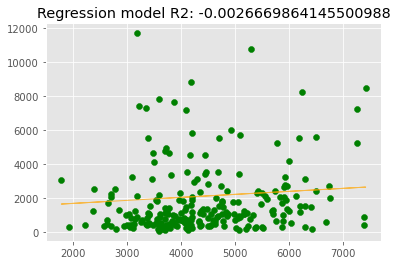

In [18]:
#TO DO:
title = 'Regression model'
drawLine(model_rb, X_test, y_test, title, score_rb)
# Model has low correlation

**8. Duplicate the process above (5,6, 7); this time, model the number of accepted students, as a function of the number of enrolled students per college.**

Don't forget to split data with random_state = 7.

In [19]:
#TO DO:
X_enr = df_College['Enroll'].values.reshape(-1, 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_enr, y_acc, test_size=0.3, random_state=7)
model_enr = model.fit(X_train, y_train)
score_enr = model_enr.score(X_test, y_test)
title = 'Regression model'

Regression model R2: 0.8578204867356156
Intercept(s):  [151.72611242]


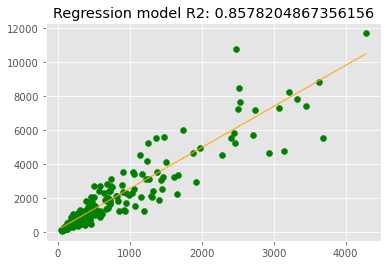

In [21]:
drawLine(model_enr, X_test, y_test, title, score_enr)
#model has high correlation

**9. Duplicate the process above (5, 6, 7); this time, model the number of accepted students, as function of the number of full-time undergraduates students per college.**

Don't forget to split data with random_state = 7.

In [22]:
#TO DO:
X_fun = df_College['F.Undergrad'].values.reshape(-1, 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_fun, y_acc, test_size=0.3, random_state=7)
model_fun = model.fit(X_train, y_train)
score_fun = model_fun.score(X_test, y_test)
title = 'Regression model'

Regression model R2: 0.7779917973754006
Intercept(s):  [380.9429105]


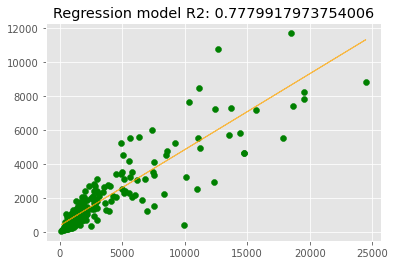

In [24]:
drawLine(model_fun, X_test, y_test, title, score_fun)
#model has high correlation

**10. Duplicate the process above (5, 6). This time is going to be a bit more complicated. Instead of modeling one feature as a function of another, you will attempt to do multivariate linear regression to model one feature as a function of TWO other features. Let's print out the model score.**

Model the number of accepted students as a function of the amount charged for room and board _and_ the number of enrolled students. To do this, instead of creating a regular slice for a single-feature input, simply create a slice that contains both columns you wish to use as inputs. Your training labels will remain a single slice.
    
Don't forget to split data with random_state = 7.

In [25]:
#TO DO:
X_enr_room = df_College[['Room.Board','Enroll']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_enr_room, y_acc, test_size=0.3, random_state=7)

In [27]:
model_enr_room = model.fit(X_train, y_train)
score_enr_room = model_enr_room.score(X_test, y_test)
title = 'Regression model'
score_enr_room

0.8764371774214047

Regression model R2: 0.8764371774214047
Intercept(s):  [-1176.62848249]


C:\Users\Admin\AppData\Local\Temp/ipykernel_11096/2640515664.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


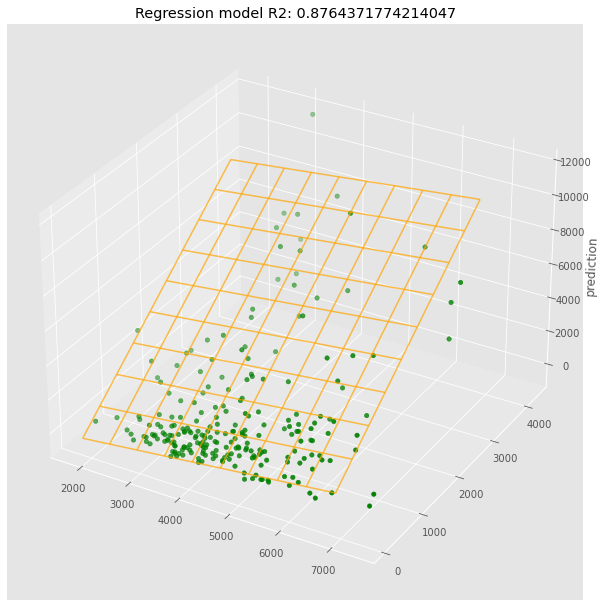

In [28]:
drawPlane(model_enr_room, X_test, y_test, title, score_enr_room)
#model has high correlation

# Advanced part (15%  of the total score)

**11. Duplicate the process above (5,6), try to use your own features set and your own model with modified parameters.**

    Requirement: Score > 0.875
    
    Don't forget to split data with random_state = 7.

In [29]:
X_Apps = df_College['Apps'].values.reshape (-1, 1)
y_acc = df_College['Accept'].values.reshape (-1, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_Apps, y_acc, test_size=0.15, random_state=7)

In [31]:
model_Apps = model.fit(X_train, y_train)
score_Apps = model_Apps.score(X_test, y_test)
score_Apps

0.8862627019442142

Regression model R2: 0.8862627019442142
Intercept(s):  [236.37416154]


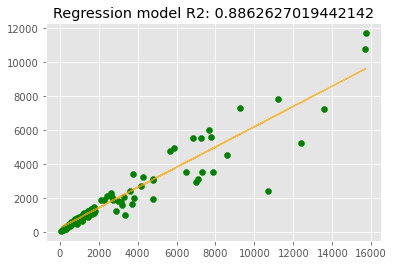

In [32]:
drawLine(model_Apps, X_test, y_test, title, score_Apps)
#model has high correlation